# 创建待优化函数

In [23]:
### General imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
### --- Figure config
LEGEND_SIZE = 15


from emukit.core import ContinuousParameter, ParameterSpace

def denormalize(X, bounds):
    return X * (bounds[:, 1] - bounds[:, 0]) + bounds[:, 0]

#  "0.1+0.2" , "fz0.1+0.2" , "0.2+0.1"  , "fz0.2+0.1" , "oth1" , "oth2"




# num = "0.05+0.05" 



def goldstein_price(x):
    
    shift1= 0
    shift2= 0
    scale = 1
    
#     shift1= 0.1
#     shift2= 0.1
#     scale = 0.8
    
    x1 = x[:, 0] 
    x2 = x[:, 1] 
    bounds1 = np.array([[-2, 2]])
    bounds2 = np.array([[-2, 2]])
    
    x1 = denormalize(x1, bounds1)
    x2 = denormalize(x2, bounds2)
    
    x1 = x1 - 4 * shift1
    x2 = x2 - 4 * shift2

    term1 = 1 + ((x1 + x2 + 1) ** 2) * (19 - 14 * x1 + 3 * x1 ** 2 - 14 * x2 + 6 * x1 * x2 + 3 * x2 ** 2)
    term2 = 30 + ((2 * x1 - 3 * x2) ** 2) * (18 - 32 * x1 + 12 * x1 ** 2 + 48 * x2 - 36 * x1 * x2 + 27 * x2 ** 2)
    f = np.log(term1 * term2)  # 加了log
    f =   f * scale 
    return f.reshape(-1, 1)

# def goldstein_price(x): #其他函数1
#     x1 = x[:, 0]
#     x2 = x[:, 1]

#     term1 = (x1 - 0.5) ** 2
#     term2 = (x2 - 0.3) ** 2
#     f = term1 * 10 + term2 * 10 
#     f = f * 2
#     return f.reshape(-1, 1)


# def goldstein_price(x): #其他函数2
#     x1 = x[:, 0]
#     x2 = x[:, 1]
#     bounds1 = np.array([[-10, 10]])
#     bounds2 = np.array([[-10, 10]])
#     x1 = denormalize(x1, bounds1)
#     x2 = denormalize(x2, bounds2)

#     a = 3.5  # 线性关系的系数
#     b = -1.0  # 线性关系的系数
#     c = 1.5  # 抛物线形状的系数

#     noise = 10  # 生成一个介于 -0.1 和 0.1 之间的随机噪声

#     f = a * x1 + b * x2 + c * x2 ** 2 + noise
#     f = f / 10
#     return f.reshape(-1, 1)



space = ParameterSpace([ContinuousParameter('x', 0, 1),
                        ContinuousParameter('y', 0, 1)])

In [24]:

x1_plot = np.linspace(space.parameters[0].min, space.parameters[0].max, 200)[:, None]
x2_plot = np.linspace(space.parameters[1].min, space.parameters[1].max, 200)[:, None]

x1_plot, x2_plot = np.meshgrid(x1_plot, x2_plot)

X_all = np.c_[x1_plot.ravel(), x2_plot.ravel()]

Y_all = goldstein_price(X_all)
y_min = np.min(Y_all)
y_max = np.max(Y_all)
print(y_min,y_max)

# 找到与 y_min 对应的 X_all
min_index = np.argmin(Y_all)
X_min = X_all[min_index]
print("X_min:", X_min)


-13.831077639029882 -1.1069966201519938
X_min: [0.06532663 1.        ]


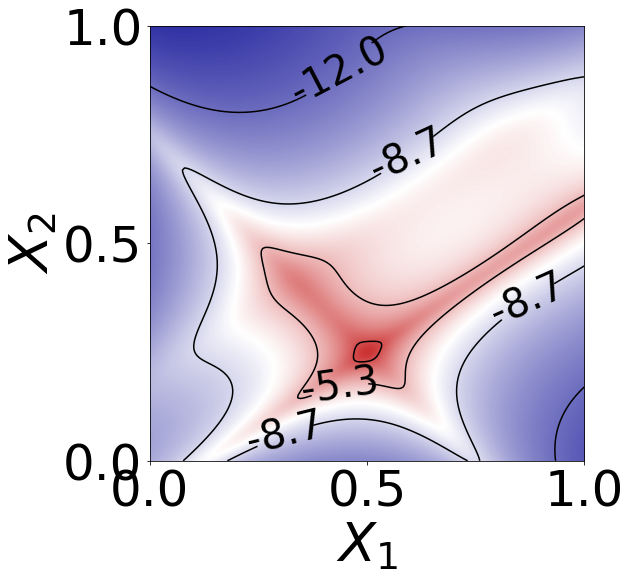

In [26]:
# In[22]:
from matplotlib.colors import LinearSegmentedColormap
#数据可视化

x = np.linspace(space.parameters[0].min, space.parameters[0].max, 200)[:, None]
y = np.linspace(space.parameters[0].min, space.parameters[0].max, 200)[:, None]
x_plot, y_plot = np.meshgrid(x, y)

Z = goldstein_price(np.c_[x_plot.ravel(), y_plot.ravel()]).reshape(x_plot.shape)
# Z = Z.ravel()
# Z = -ei_acquisition_nom+1



plt.figure(figsize=(12, 8))

marker_color = (63/255, 101/255, 97/255)


fontsize=50
# plt.legend(loc=2, prop={'size': fontsize})

colors = [(0.2, 0.2, 0.65), (1, 1, 1), (0.8, 0.2, 0.2)]  # 从深紫色到白色再到红褐色
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='RdGy_r')
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap=cmap, alpha=1)

# colorbar = plt.colorbar()
# colorbar.ax.tick_params(labelsize=fontsize)
# plt.rc('font', size=fontsize) 
contour_lines = plt.contour(x_plot, y_plot, Z, levels=np.linspace(-12, -2, 4), colors='black',linestyles='solid',  alpha=1)
# contour_lines = plt.contour(x_plot, y_plot, Z, levels=np.linspace(2, 12, 4), colors='black',linestyles='solid',  alpha=1)
plt.clabel(contour_lines, fontsize=fontsize*0.8, colors='black', inline=True, fmt='%.1f')




# 修改 x 轴和 y 轴的标签
plt.xlabel('$X_1$', fontsize=fontsize+4)
plt.ylabel('$X_2$', fontsize=fontsize+4)

# 设置 x 轴的刻度标签字体大小为 12
plt.xticks([0, 0.5, 1], fontsize=fontsize)

# 设置 y 轴的刻度标签字体大小为 12
plt.yticks([0, 0.5, 1], fontsize=fontsize)

# plt.gca().axes.get_xaxis().set_visible(False)
# plt.gca().axes.get_yaxis().set_visible(False)


plt.show()


# 开始建模

In [29]:

from pyDOE import lhs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import emukit
import GPy
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

from emukit.bayesian_optimization.loops import BayesianOptimizationLoop
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, \
                                                      NegativeLowerConfidenceBound, \
                                                      MaxValueEntropySearch, \
                                                      ProbabilityOfImprovement
from emukit.core.acquisition import IntegratedHyperParameterAcquisition

In [30]:
num_x_init = 150

model_var = 0.1

num_restarts = 10

In [31]:

X = lhs(len(space.parameters), num_x_init, criterion='maximin')
Y = goldstein_price(X)

input_dim = len(X[0])

ker = GPy.kern.Matern52(input_dim = input_dim, ARD = True)#


ker.lengthscale.constrain_bounded(1e-1, 10)
ker.variance.constrain_bounded(1e-1, 1000.0)

model_gpy = GPRegression(X,Y, ker)

model_gpy.Gaussian_noise.variance = model_var**2
model_gpy.Gaussian_noise.variance.fix()

model_gpy.randomize()
model_gpy.optimize_restarts(num_restarts=num_restarts,verbose =False, messages=False)

emukit_model = GPyModelWrapper(model_gpy)


ei_acquisition = NegativeLowerConfidenceBound(emukit_model)

ei_plot = ei_acquisition.evaluate(np.c_[x1_plot.ravel(), x2_plot.ravel()]).reshape(x1_plot.shape)
ei_acquisition_nom = (ei_plot - np.min(ei_plot)) / (np.max(ei_plot) - np.min(ei_plot))



reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


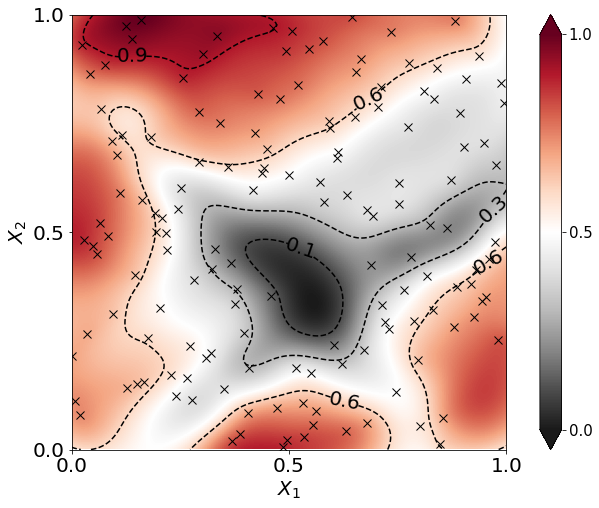

In [32]:
# In[22]:
from matplotlib.colors import LinearSegmentedColormap
#数据可视化


x = np.linspace(space.parameters[0].min, space.parameters[0].max, 200)[:, None]
y = np.linspace(space.parameters[0].min, space.parameters[0].max, 200)[:, None]
x_plot, y_plot = np.meshgrid(x, y)

Z = -ei_acquisition_nom+1


x_points = X[:, 0]
y_points = X[:, 1]


plt.figure(figsize=(12, 8))


# plt.plot(x_points, y_points, "ro", markersize=6, label="Observations")
plt.plot(x_points, y_points, "x", markersize=8, color="black",label="Observations")

# # 绘制前 sample_init 个点为黑色
# plt.plot(x_points[:sample_init], y_points[:sample_init],"x", markersize=12, color="black",label="Observations")

# # 绘制剩余的点为红色
# plt.plot(x_points[sample_init:], y_points[sample_init:], "ro", markersize=9, label="Remaining Observations")


contour = plt.contour(x_plot, y_plot, Z, levels=[0.1, 0.3, 0.6, 0.9], colors='k', linestyles='dashed')  # 绘制四条等高线
plt.clabel(contour, inline=1, fontsize=20, fmt='%1.1f')  # 添加等高线标签

# # 自定义颜色映射，降低蓝色深度
# colors = [(0.2, 0.2, 0.65), (1, 1, 1), (0.8, 0.2, 0.2)]  # 从深紫色到白色再到红褐色
# cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
# plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap=cmap)


plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='RdGy_r')


cbar = plt.colorbar(extend='both')
cbar.set_ticks([0, 0.5, 1])

# plt.title('Source Function')

fontsize=20

# 修改 x 轴和 y 轴的标签
plt.xlabel('$X_1$', fontsize=fontsize)
plt.ylabel('$X_2$', fontsize=fontsize)


# 设置 x 轴的刻度标签字体大小为 12
plt.xticks([0, 0.5, 1], fontsize=fontsize)

# 设置 y 轴的刻度标签字体大小为 12
plt.yticks([0, 0.5, 1], fontsize=fontsize)


plt.show()

In [33]:
import pickle

base_model_1 = emukit_model
nlcb_1 = ei_acquisition_nom

# 定义文件夹路径
folder_path = 'base-models'

# 保存 base_model_1 到文件
with open(f'base_model_{num}.pkl', 'wb') as f:
    pickle.dump(base_model_1, f)


    
